In [1]:
import sys
sys.path.append('..')

import navbench as nb
from navbench import improc as ip

FRAME_DIST = 500
IMSIZE = (180, 55)
FR_STEP = 1
FRAME = 700

resize = ip.resize(*IMSIZE)

db = nb.Database('bottom_of_campus/straight_route2_fwd')

images, snap, entries = db.load_test_frames(
    FRAME, FRAME_DIST, resize, fr_step=FR_STEP)

goal_idx = int((FRAME - entries[0]) / FR_STEP)
assert entries[goal_idx] == FRAME

Testing frames 200 to 1200 (n=1001)


1 zero values (perfect matches?) are not being shown


Text(0.5, 1.0, 'Median filtering over 11 frames')

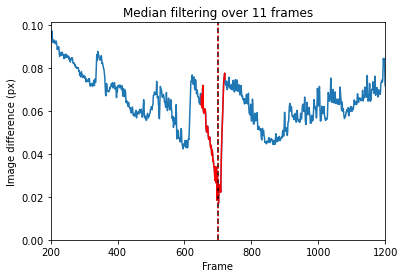

In [2]:
MEDFILT_SIZE = 11

idf = nb.route_idf(images, snap)
bounds, *_ = nb.idf_ca_bounds(idf, medfilt_size=MEDFILT_SIZE)

ax = nb.plot_ca(entries, idf, bounds, goal_idx)
ax.set_ylim(bottom=0)
ax.set_xlabel('Frame')
ax.set_ylabel('Image difference (px)')
ax.set_title('Median filtering over %i frames' % MEDFILT_SIZE)

Text(0.5, 1.0, 'Median filtering over 3 frames')

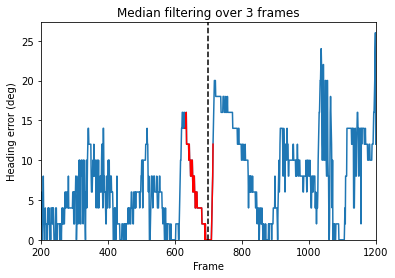

In [3]:
MEDFILT_SIZE = 3

ths = nb.route_ridf_errors(images, snap)
bounds, *_ = nb.rca_bounds(ths, thresh=15, goal_idx=goal_idx, medfilt_size=MEDFILT_SIZE)

ax = nb.plot_ca(entries, ths, bounds, goal_idx, filter_zeros=False)
ax.set_xlabel('Frame')
ax.set_ylabel('Heading error (deg)')
ax.set_title('Median filtering over %i frames' % MEDFILT_SIZE)